In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
air19 = pd.read_csv("air2019.csv")
air20 = pd.read_csv("air2020.csv")
air19 = pd.DataFrame(air19)
air20 = pd.DataFrame(air20)

In [3]:
pd.to_datetime(air19['Date'])
pd.to_datetime(air20['Date'])

0      2020-01-04
1      2020-01-10
2      2020-01-16
3      2020-01-22
4      2020-01-28
5      2020-02-03
6      2020-02-09
7      2020-02-15
8      2020-02-21
9      2020-02-27
10     2020-03-04
11     2020-03-10
12     2020-03-16
13     2020-03-22
14     2020-03-28
15     2020-04-03
16     2020-04-15
17     2020-04-21
18     2020-04-27
19     2020-05-03
20     2020-05-15
21     2020-05-27
22     2020-06-02
23     2020-06-08
24     2020-06-16
25     2020-06-20
26     2020-06-26
27     2020-07-02
28     2020-07-14
29     2020-07-20
          ...    
3069   2020-11-30
3070   2020-12-01
3071   2020-12-02
3072   2020-12-03
3073   2020-12-04
3074   2020-12-05
3075   2020-12-06
3076   2020-12-07
3077   2020-12-08
3078   2020-12-09
3079   2020-12-10
3080   2020-12-11
3081   2020-12-12
3082   2020-12-13
3083   2020-12-14
3084   2020-12-15
3085   2020-12-16
3086   2020-12-17
3087   2020-12-18
3088   2020-12-19
3089   2020-12-20
3090   2020-12-21
3091   2020-12-22
3092   2020-12-23
3093   202

In [4]:
air19.rename(columns={"Daily Mean PM2.5 Concentration": "PM2.5 2019"}, inplace=True)
air20.rename(columns={"Daily Mean PM2.5 Concentration": "PM2.5 2020"}, inplace=True)

In [5]:
meanPM2_5_2019 = pd.DataFrame(air19.groupby(["Date"])["PM2.5 2019"].mean())
meanPM2_5_2020 = pd.DataFrame(air20.groupby(["Date"])["PM2.5 2020"].mean())
meanPM2_5_2019.reset_index(inplace=True)
meanPM2_5_2020.reset_index(inplace=True)

In [6]:
dfs = [meanPM2_5_2019, meanPM2_5_2020]
#combine columns
#pm25 = pd.concat(dfs, ignore_index=True, keys=['2019', '2020'])
#combine rows
pm25 = pd.concat(dfs, axis=1)

In [7]:
pm25.columns = ["date19", "PM2.5 2019", "date20", "PM2.5 2020"]

In [ ]:
#%matplotlib
#meanPM2_5_2019.plot.line(x="Date",y="2019 PM2.5", title="2019")
#meanPM2_5_2020.plot.line(x="Date",y="2020 PM2.5", title="2020")

Text(0,0.5,'Daily Mean PM2.5 Concentration')

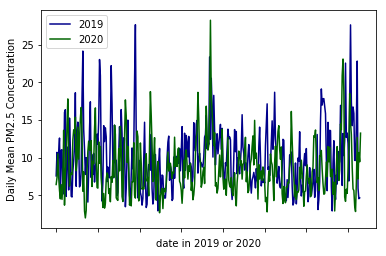

In [11]:
ax = pm25.plot(kind='line', x='date19', y='PM2.5 2019',color='DarkBlue', label='2019')
pm25.plot(kind='line', x='date20', y='PM2.5 2020',color='DarkGreen', label='2020', ax=ax)
ax.set_xlabel("date in 2019 or 2020")
ax.set_ylabel("Daily Mean PM2.5 Concentration")

In [9]:
pm25['diff'] = pm25['PM2.5 2020'] - pm25['PM2.5 2019'] 

In [10]:
pm25.head()

,date19,PM2.5 2019,date20,PM2.5 2020,diff
0,01/01/2019,7.583333,01/01/2020,6.440000,-1.143333
1,01/02/2019,10.716667,01/02/2020,7.342857,-3.373810
2,01/03/2019,9.137500,01/03/2020,10.520000,1.382500
3,01/04/2019,10.633333,01/04/2020,7.436842,-3.196491
4,01/05/2019,12.612500,01/05/2020,5.657143,-6.955357


Text(0,0.5,'Difference in PM2.5 Concentration 2020-2019')

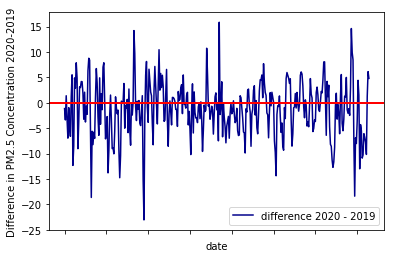

In [22]:
ax = pm25.plot(kind='line', x='date19', y='diff',color='DarkBlue', label = 'difference 2020 - 2019')
ax.axhline(linewidth=2, color='r')
ax.set_xlabel("date")
ax.set_ylabel("Difference in PM2.5 Concentration 2020-2019")

In [19]:
#moving average 
#https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
def moving_av(data_list):
    N = 2
    cumsum, moving_aves = [0], []

    for i, x in enumerate(data_list, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            moving_aves.append(moving_ave)
    return moving_aves

In [26]:
move_av_2019 = moving_av(pm25['PM2.5 2019'])
move_av_2020 = moving_av(pm25['PM2.5 2020'])
move_av_2019 = pd.DataFrame(move_av_2019)
move_av_2020 = pd.DataFrame(move_av_2020)
pm25 = pd.concat([pm25,move_av_2019], ignore_index=True, axis=1)
pm25 = pd.concat([pm25,move_av_2020], ignore_index=True, axis=1)
pm25.columns = ["date19", "PM2.5 2019", "date20", "PM2.5 2020", "move_av_2019", "move_av_2020"]

ValueError: Length mismatch: Expected axis has 7 elements, new values have 6 elements

In [21]:
pm25

,date19,PM2.5 2019,date20,PM2.5 2020,diff
0,01/01/2019,7.583333,01/01/2020,6.440000,-1.143333
1,01/02/2019,10.716667,01/02/2020,7.342857,-3.373810
2,01/03/2019,9.137500,01/03/2020,10.520000,1.382500
3,01/04/2019,10.633333,01/04/2020,7.436842,-3.196491
4,01/05/2019,12.612500,01/05/2020,5.657143,-6.955357
5,01/06/2019,5.483333,01/06/2020,4.528571,-0.954762
6,01/07/2019,11.000000,01/07/2020,6.433333,-4.566667
7,01/08/2019,11.066667,01/08/2020,4.462500,-6.604167
8,01/09/2019,5.155556,01/09/2020,6.375000,1.219444
9,01/10/2019,8.150000,01/10/2020,13.645000,5.495000
